# DeOldify model 
allows organic colorization of photos and videos. You can bring back the old historical footage to vivid life 

In [3]:
#Load the pre-trained model
!git clone https://github.com/jantic/DeOldify.git DeOldify 

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [4]:
cd DeOldify

/content/DeOldify


In [5]:
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 215kB 7.5MB/s 
     |████████████████████████████████| 133kB 11.6MB/s 
     |████████████████████████████████| 1.9MB 10.2MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=ffcbc97165c4adbce1837a2fa8c6f528f55e06fbeb62e9edad796f08f8f7c42f
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
  Created wheel for typing: filename=typing-3.7.4.3-cp37-none-any.whl size=26308 sha256=024370396d1c702624ea6f56d1baeb83efbd031ebde1df6ede60294b795f15b2
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built ffmpeg typing
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


Define the import statements

In [6]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [7]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2021-04-10 07:06:44--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  20.3MB/s    in 13s     

2021-04-10 07:06:57 (19.1 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [8]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-04-10 07:08:13--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-04-10 07:08:13 (87.9 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [9]:
colorizer = get_image_colorizer(artistic=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


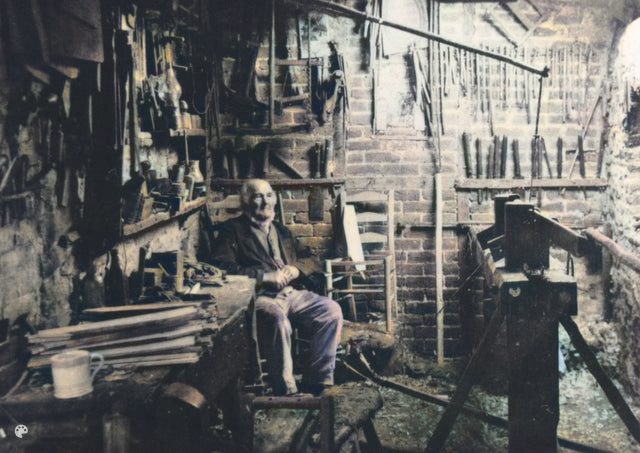

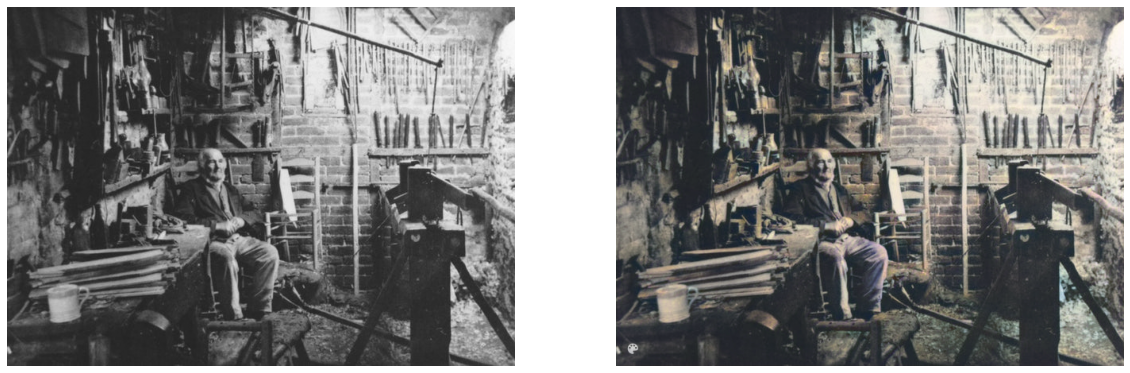

In [11]:
source_url = 'https://preview.redd.it/hwi7kwj3z5s61.jpg?width=640&crop=smart&auto=webp&s=1cd6103ac4e2fcefcccc645e58229d3527d27043' #@param {type:"string"}
render_factor = 39  #@param {type: "slider", min: 7, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

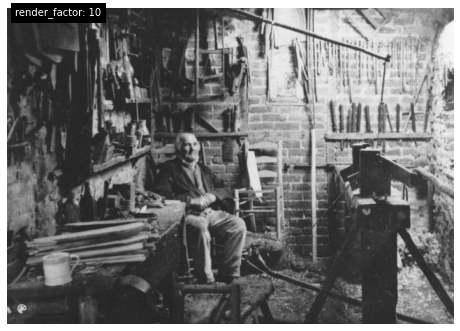

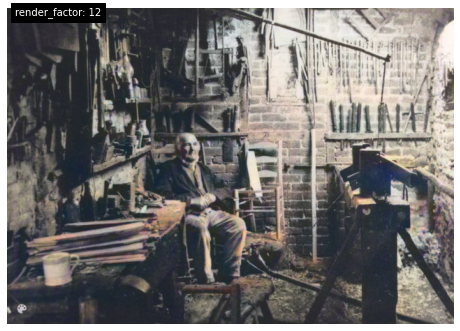

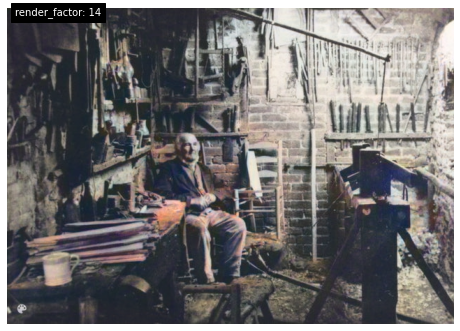

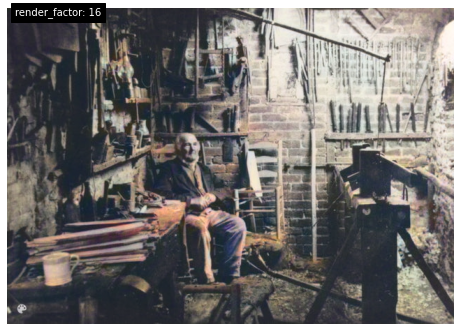

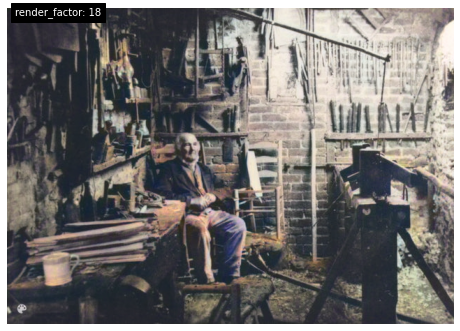

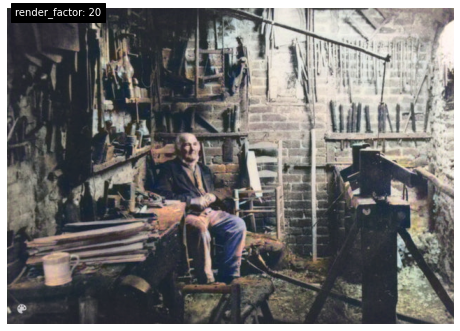

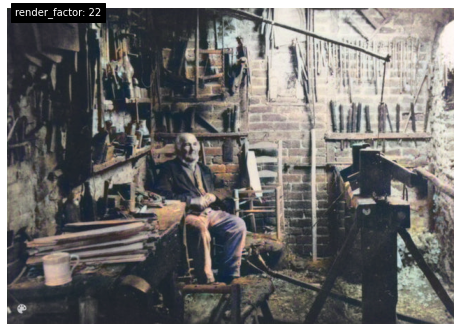

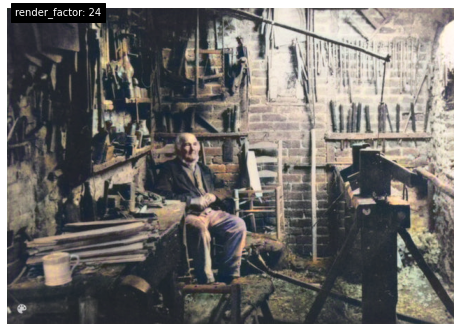

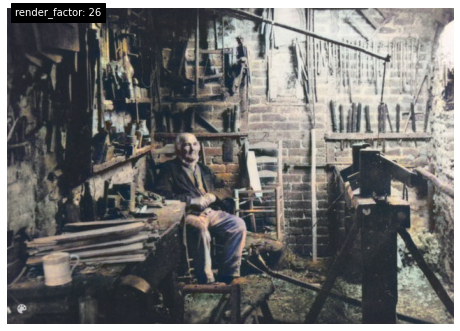

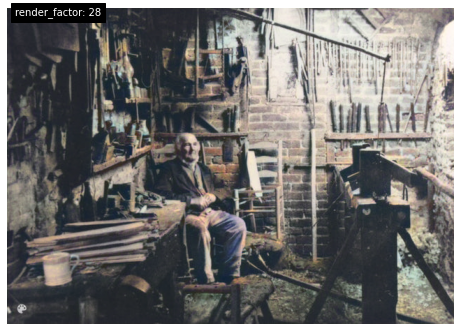

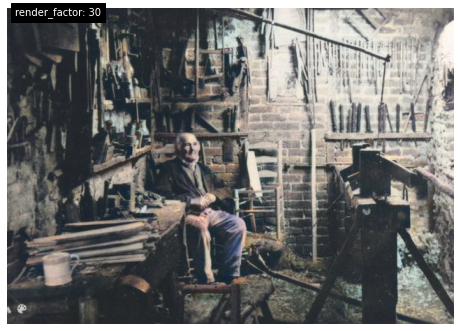

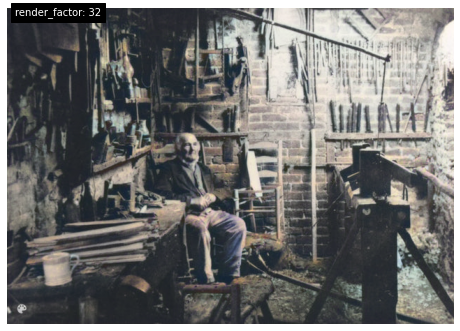

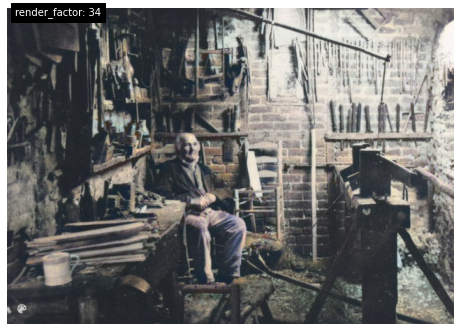

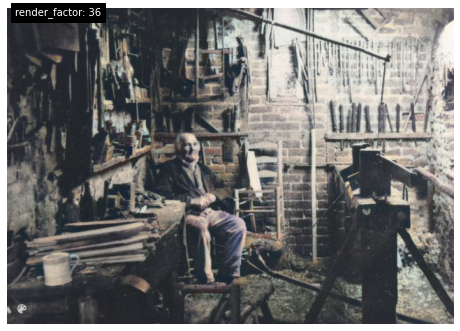

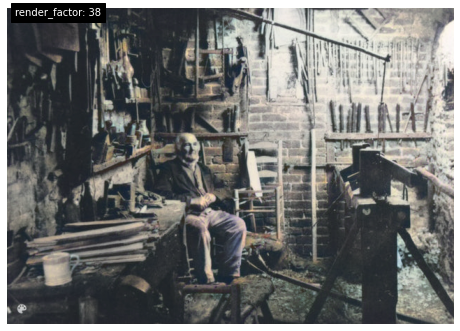

In [12]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))